In [4]:
import geopandas 

In [5]:
import fiona

In [6]:
import shapely

In [7]:
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('201910-citibike-tripdata.csv')
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.round('H').dt.hour
df['age'] = 2020 - df['birth year']
df.head()

tripduration               starttime                stoptime  \
0           527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1           174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2           759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3           615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4           761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   

   start station id      start station name  start station latitude  \
0              3746       6 Ave & Broome St               40.724308   
1              3301  Columbus Ave & W 95 St               40.791956   
2               161   LaGuardia Pl & W 3 St               40.729170   
3               254         W 11 St & 6 Ave               40.735324   
4               161   LaGuardia Pl & W 3 St               40.729170   

   start station longitude  end station id        end station name  \
0               -74.004730             223         W 13 St & 7 Ave   
1               -73.968087            3283  W 89 St & Columbus Ave   
2               -73.998102             174         E 25 St & 1 Ave   
3               -73.998004             477         W 41 St & 8 Ave   
4               -73.998102             174         E 25 St & 1 Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.737815             -73.999947   41750  Subscriber   
1             40.788221             -73.970416   18264  Subscriber   
2             40.738177             -73.977387   25525  Subscriber   
3             40.756405             -73.990026   30186  Subscriber   
4             40.738177             -73.977387   25597  Subscriber   

   birth year  gender        date  hour  age  
0        1993       1  2019-10-01     0   27  
1        1992       1  2019-10-01     0   28  
2        1995       1  2019-10-01     0   25  
3        1992       1  2019-10-01     0   28  
4        1992       1  2019-10-01     0   28

In [14]:
df['usertype'].value_counts()

Subscriber    1796820
Customer       295753
Name: usertype, dtype: int64

In [35]:
df['gender'].value_counts()

1    1425934
2     512899
0     153740
Name: gender, dtype: int64

In [422]:
df['birth year'].value_counts()

1969    166763
1990     87282
1989     86139
1992     83961
1991     82909
         ...  
1923         2
1926         1
1909         1
1916         1
1874         1
Name: birth year, Length: 106, dtype: int64

In [66]:
df['start station id'].nunique()

837

In [ ]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=df)


ValueError: num must be 1 <= num <= 18, not 19

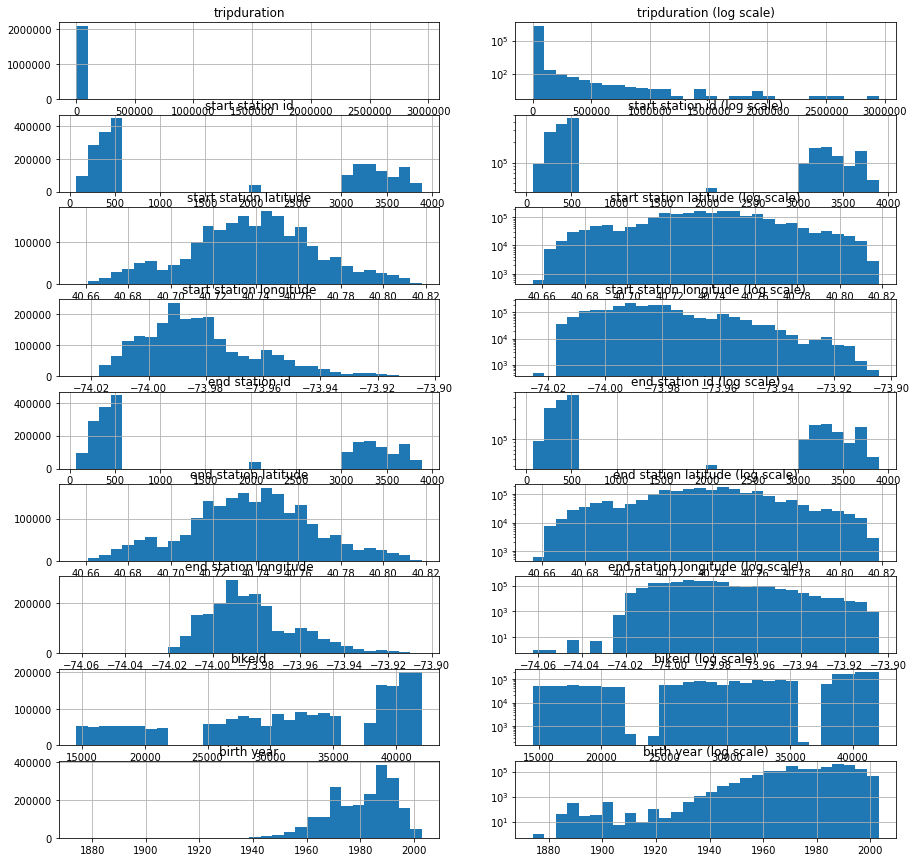

In [195]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15,15))

i = 1
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()

In [566]:
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)}) 

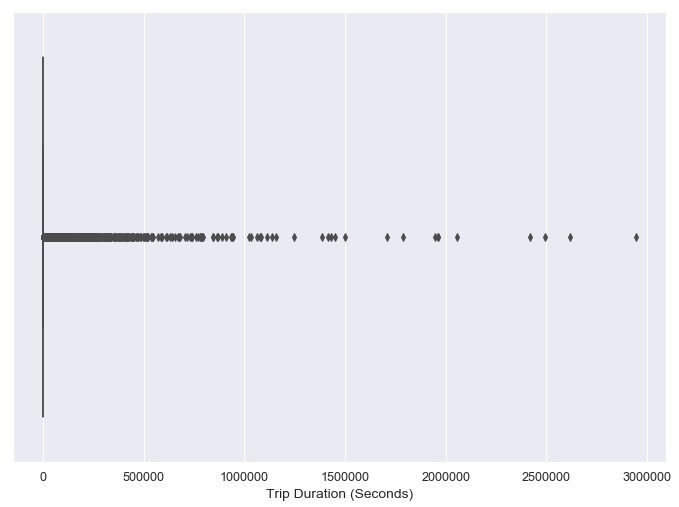

In [213]:
ax = sns.boxplot(x=df['tripduration'])
ax.set(xlabel='Trip Duration (Seconds)')
plt.show()

In [10]:
df[df['tripduration']>24*60*60*1].count()

tripduration               487
starttime                  487
stoptime                   487
start station id           487
start station name         487
start station latitude     487
start station longitude    487
end station id             487
end station name           487
end station latitude       487
end station longitude      487
bikeid                     487
usertype                   487
birth year                 487
gender                     487
date                       487
hour                       487
age                        487
dtype: int64

In [11]:
df = df[df['tripduration']<=24*60*60] #only count trips that last about a day

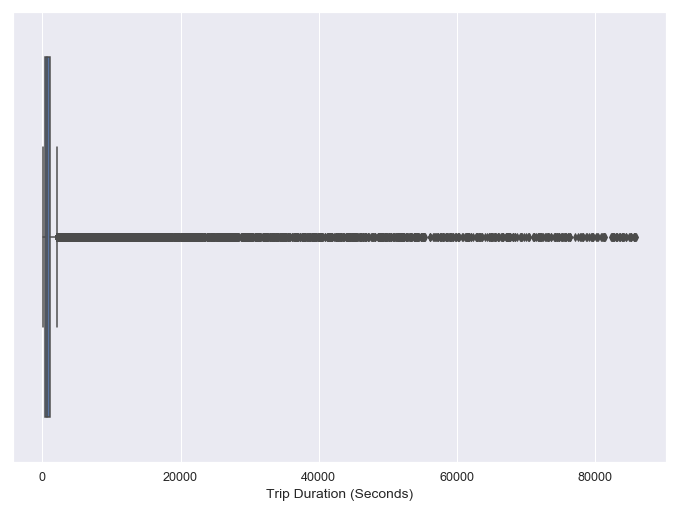

In [216]:
ax = sns.boxplot(x=df['tripduration'])
ax.set(xlabel='Trip Duration (Seconds)')
plt.show()

In [560]:
df.count()

tripduration               2092086
starttime                  2092086
stoptime                   2092086
start station id           2092086
start station name         2092086
start station latitude     2092086
start station longitude    2092086
end station id             2092086
end station name           2092086
end station latitude       2092086
end station longitude      2092086
bikeid                     2092086
usertype                   2092086
birth year                 2092086
gender                     2092086
date                       2092086
hour                       2092086
age                        2092086
bin                        2091127
dtype: int64

In [562]:
df['tripduraation'].mean()

841.526961128749

In [563]:
df['tripduration'].mode()

0    324
dtype: int64

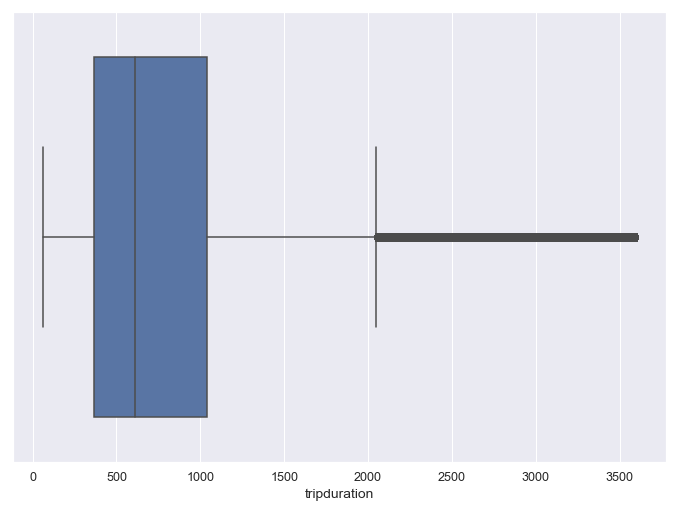

In [217]:
sns.boxplot(x=(df['tripduration'][df['tripduration']<=60*60]))

In [564]:
df.head()

tripduration               starttime                stoptime  \
0           527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1           174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2           759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3           615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4           761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   

   start station id      start station name  start station latitude  \
0              3746       6 Ave & Broome St               40.724308   
1              3301  Columbus Ave & W 95 St               40.791956   
2               161   LaGuardia Pl & W 3 St               40.729170   
3               254         W 11 St & 6 Ave               40.735324   
4               161   LaGuardia Pl & W 3 St               40.729170   

   start station longitude  end station id        end station name  \
0               -74.004730             223         W 13 St & 7 Ave   
1               -73.968087            3283  W 89 St & Columbus Ave   
2               -73.998102             174         E 25 St & 1 Ave   
3               -73.998004             477         W 41 St & 8 Ave   
4               -73.998102             174         E 25 St & 1 Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.737815             -73.999947   41750  Subscriber   
1             40.788221             -73.970416   18264  Subscriber   
2             40.738177             -73.977387   25525  Subscriber   
3             40.756405             -73.990026   30186  Subscriber   
4             40.738177             -73.977387   25597  Subscriber   

   birth year  gender        date  hour  age       bin  
0        1993       1  2019-10-01     0   27  (20, 30]  
1        1992       1  2019-10-01     0   28  (20, 30]  
2        1995       1  2019-10-01     0   25  (20, 30]  
3        1992       1  2019-10-01     0   28  (20, 30]  
4        1992       1  2019-10-01     0   28  (20, 30]

(array([0, 1]), <a list of 2 Text xticklabel objects>)

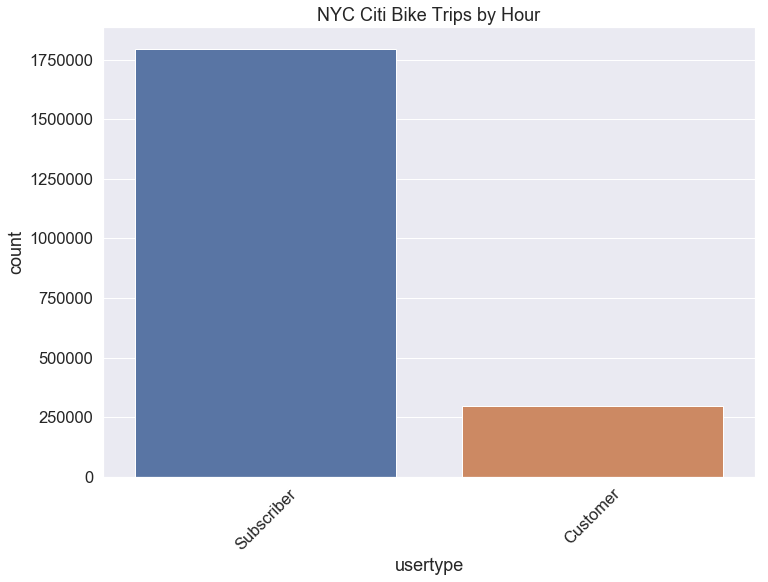

In [567]:
sns.countplot(x =df['usertype']).set_title("NYC Citi Bike Trips by Hour")
plt.xticks(rotation=45)

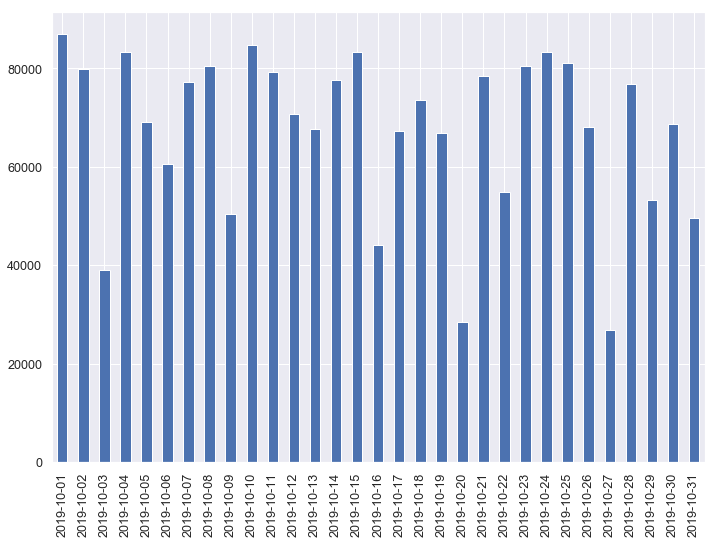

In [227]:
df['date'].value_counts().sort_index().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

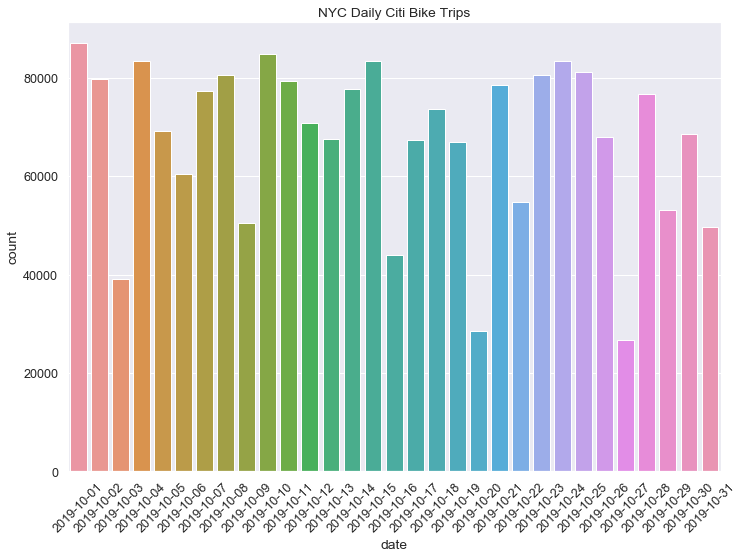

In [267]:
sns.countplot(x =df['date']).set_title("NYC Daily Citi Bike Trips")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

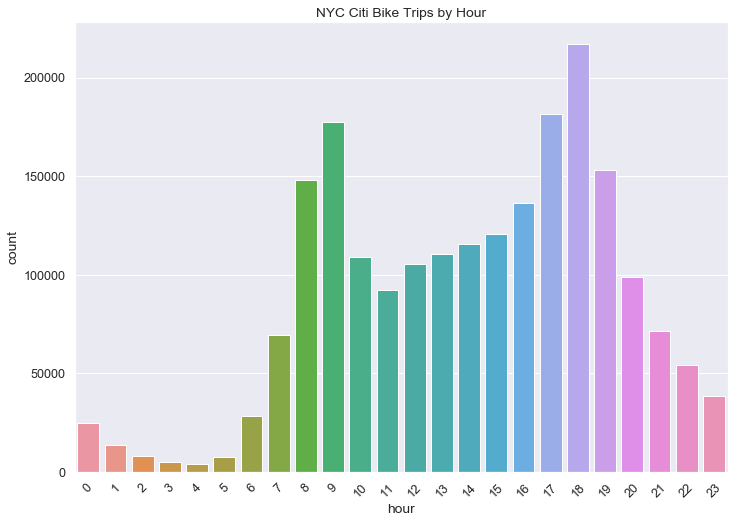

In [268]:
sns.countplot(x =df['hour']).set_title("NYC Citi Bike Trips by Hour")
plt.xticks(rotation=45)

In [554]:
df

tripduration               starttime                stoptime  \
0                 527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1                 174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2                 759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3                 615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4                 761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   
...               ...                     ...                     ...   
2092568           729 2019-10-31 23:59:12.190 2019-11-01 00:11:21.486   
2092569           645 2019-10-31 23:59:17.047 2019-11-01 00:10:02.945   
2092570           257 2019-10-31 23:59:22.514 2019-11-01 00:03:40.260   
2092571           466 2019-10-31 23:59:23.171 2019-11-01 00:07:09.205   
2092572            81 2019-10-31 23:59:51.517 2019-11-01 00:01:13.215   

         start station id              start station name  \
0                    3746               6 Ave & Broome St   
1                    3301          Columbus Ave & W 95 St   
2                     161           LaGuardia Pl & W 3 St   
3                     254                 W 11 St & 6 Ave   
4                     161           LaGuardia Pl & W 3 St   
...                   ...                             ...   
2092568               237                 E 11 St & 2 Ave   
2092569              3259                 9 Ave & W 28 St   
2092570              3798                 W 40 St & 5 Ave   
2092571               328         Watts St & Greenwich St   
2092572               539  Metropolitan Ave & Bedford Ave   

         start station latitude  start station longitude  end station id  \
0                     40.724308               -74.004730             223   
1                     40.791956               -73.968087            3283   
2                     40.729170               -73.998102             174   
3                     40.735324               -73.998004             477   
4                     40.729170               -73.998102             174   
...                         ...                      ...             ...   
2092568               40.730473               -73.986724             311   
2092569               40.749370               -73.999234             461   
2092570               40.752269               -73.982079             505   
2092571               40.724055               -74.009660             361   
2092572               40.715348               -73.960241            3093   

               end station name  end station latitude  end station longitude  \
0               W 13 St & 7 Ave             40.737815             -73.999947   
1        W 89 St & Columbus Ave             40.788221             -73.970416   
2               E 25 St & 1 Ave             40.738177             -73.977387   
3               W 41 St & 8 Ave             40.756405             -73.990026   
4               E 25 St & 1 Ave             40.738177             -73.977387   
...                         ...                   ...                    ...   
2092568  Norfolk St & Broome St             40.717227             -73.988021   
2092569         E 20 St & 2 Ave             40.735877             -73.982050   
2092570         6 Ave & W 33 St             40.749013             -73.988484   
2092571    Allen St & Hester St             40.716059             -73.991908   
2092572    N 6 St & Bedford Ave             40.717452             -73.958509   

         bikeid    usertype  birth year  gender        date  hour  age  
0         41750  Subscriber        1993       1  2019-10-01     0   27  
1         18264  Subscriber        1992       1  2019-10-01     0   28  
2         25525  Subscriber        1995       1  2019-10-01     0   25  
3         30186  Subscriber        1992       1  2019-10-01     0   28  
4         25597  Subscriber        1992       1  2019-10-01     0   28  
...         ...         ...         ...     ...         ...   ...  ...  
2092568   2572

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

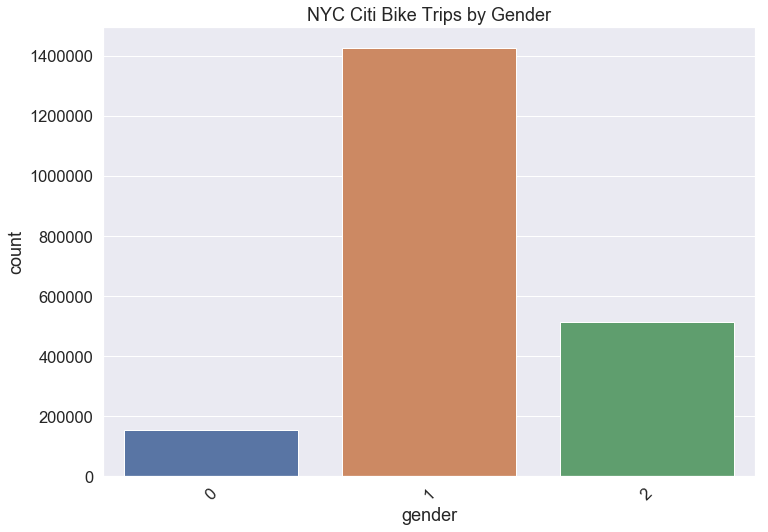

In [568]:
sns.countplot(x =df['gender']).set_title("NYC Citi Bike Trips by Gender")
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]),
 <a list of 106 Text xticklabel objects>)

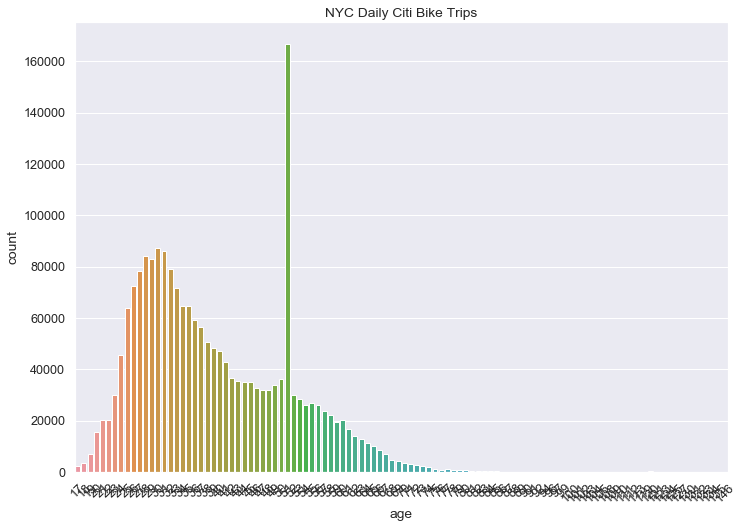

In [555]:
sns.countplot(x =df['age']).set_title("NYC Daily Citi Bike Trips")
plt.xticks(rotation=45)

In [556]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

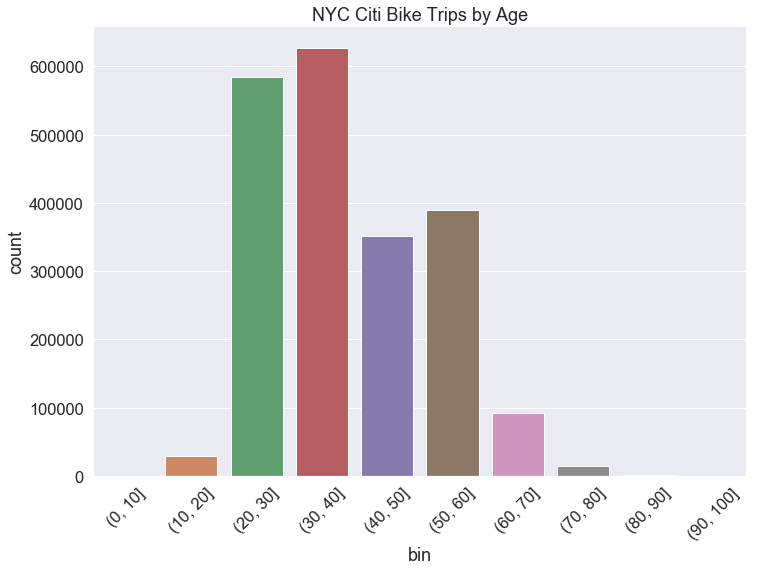

In [569]:
sns.countplot(x =df['bin']).set_title("NYC Citi Bike Trips by Age")
plt.xticks(rotation=45)

In [26]:
weather = pd.read_csv('weatherdata.csv')

In [27]:
weather=weather.rename(columns = {'DATE':'date'})
weather['date'] = pd.to_datetime(weather['date'], errors='coerce')
weather['date'] = weather['date'].dt.date
weather

STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
5   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
6   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
7   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
8   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
9   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
10  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
11  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
12  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
13  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
14  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
15  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
16  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
17  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
18  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
19  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
20  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
21  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
22  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
23  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
24  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
25  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
26  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
27  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
28  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
29  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
30  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

          date   AWND  PRCP  SNOW  SNWD  ...  TMIN  WDF2  WDF5  WSF2  WSF5  \
0   2019-10-01   3.80  0.00   0.0   0.0  ...    63   220   220  13.0  23.9   
1   2019-10-02   6.49  0.03   0.0   0.0  ...    63   240   230  14.1  21.9   
2   2019-10-03   6.26  0.34   0.0   0.0  ...    53    50    30  15.0  23.0   
3   2019-10-04   6.93  0.00   0.0   0.0  ...    50    40    50  18.1  28.0   
4   2019-10-05   4.92  0.00   0.0   0.0  ...    45    30    20  13.0  21.9   
5   2019-10-06   2.91  0.01   0.0   0.0  ...    57   160   200  10.1  19.0   
6   2019-10-07   4.03  0.20   0.0   0.0  ...    59   260   230  13.0  21.9   
7   2019-10-08   7.83  0.02   0.0   0.0  ...    57    50    40  16.1  25.9   
8   2019-10-09  10.51  0.54   0.0   0.0  ...    51    40    30  17.0  25.9   
9   2019-10-10   9.62  0.00   0.0   0.0  ...    53    60    50  17.0  28.0   
10  2019-10-11   9.17  0.00   0.0   0.0  ...    55    50    50  19.9  29.1   
11  2019-10-12   3.58  0.00   0.0   0.0  ...    55    40    20  12.1  16.1   
12  2019-10-13   2.01  0.00   0.0   0.0  ...    53    50   280   8.1  12.1   
13  2019-10-14   4.03  0.00   0.0   0.0  ...    58   240   230  15.0  23.0   
14  2019-10-15   2.91  0.00   0.0   0.0  ...    51    50    50   8.9  13.0   
15  2019-10-16   6.49  1.83   0.0   0.0  ...    52   280   270  21.0  38.9   
16  2019-10-17  11.63  0.00   0.0   0.0  ...    51   270   270  23.0  40.9   
17  2019-10-18   8.72  0.00   0.0   0.0  ..

In [28]:
weather[['date', 'TMAX', 'TMIN']]

date  TMAX  TMIN
0   2019-10-01    81    63
1   2019-10-02    93    63
2   2019-10-03    63    53
3   2019-10-04    66    50
4   2019-10-05    61    45
5   2019-10-06    70    57
6   2019-10-07    79    59
7   2019-10-08    64    57
8   2019-10-09    59    51
9   2019-10-10    71    53
10  2019-10-11    64    55
11  2019-10-12    67    55
12  2019-10-13    67    53
13  2019-10-14    72    58
14  2019-10-15    64    51
15  2019-10-16    66    52
16  2019-10-17    57    51
17  2019-10-18    58    47
18  2019-10-19    60    43
19  2019-10-20    59    49
20  2019-10-21    67    51
21  2019-10-22    63    55
22  2019-10-23    65    54
23  2019-10-24    67    50
24  2019-10-25    65    52
25  2019-10-26    63    52
26  2019-10-27    67    55
27  2019-10-28    63    55
28  2019-10-29    59    54
29  2019-10-30    63    58
30  2019-10-31    71    60

In [29]:
test = pd.merge(df, weather[['date', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND']], on='date')
test

tripduration               starttime                stoptime  \
0                 527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1                 174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2                 759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3                 615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4                 761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   
...               ...                     ...                     ...   
2092081           729 2019-10-31 23:59:12.190 2019-11-01 00:11:21.486   
2092082           645 2019-10-31 23:59:17.047 2019-11-01 00:10:02.945   
2092083           257 2019-10-31 23:59:22.514 2019-11-01 00:03:40.260   
2092084           466 2019-10-31 23:59:23.171 2019-11-01 00:07:09.205   
2092085            81 2019-10-31 23:59:51.517 2019-11-01 00:01:13.215   

         start station id              start station name  \
0                    3746               6 Ave & Broome St   
1                    3301          Columbus Ave & W 95 St   
2                     161           LaGuardia Pl & W 3 St   
3                     254                 W 11 St & 6 Ave   
4                     161           LaGuardia Pl & W 3 St   
...                   ...                             ...   
2092081               237                 E 11 St & 2 Ave   
2092082              3259                 9 Ave & W 28 St   
2092083              3798                 W 40 St & 5 Ave   
2092084               328         Watts St & Greenwich St   
2092085               539  Metropolitan Ave & Bedford Ave   

         start station latitude  start station longitude  end station id  \
0                     40.724308               -74.004730             223   
1                     40.791956               -73.968087            3283   
2                     40.729170               -73.998102             174   
3                     40.735324               -73.998004             477   
4                     40.729170               -73.998102             174   
...                         ...                      ...             ...   
2092081               40.730473               -73.986724             311   
2092082               40.749370               -73.999234             461   
2092083               40.752269               -73.982079             505   
2092084               40.724055               -74.009660             361   
2092085               40.715348               -73.960241            3093   

               end station name  end station latitude  ...  gender  \
0               W 13 St & 7 Ave             40.737815  ...       1   
1        W 89 St & Columbus Ave             40.788221  ...       1   
2               E 25 St & 1 Ave             40.738177  ...       1   
3               W 41 St & 8 Ave             40.756405  ...       1   
4               E 25 St & 1 Ave             40.738177  ...       1   
...                         ...                   ...  ...     ...   
2092081  Norfolk St & Broome St             40.717227  ...       1   
2092082         E 20 St & 2 Ave             40.735877  ...       0   
2092083         6 Ave & W 33 St             40.749013  ...       1   
2092084    Allen St & Hester St             40.716059  ...       0   
2092085    N 6 St & Bedford Ave             40.717452  ...       1   

               date hour  age  PRCP SNOW  SNWD  TMAX  TMIN  AWND  
0        2019-10-01    0   27  0.00  0.0   0.0    81    63  3.80  
1        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
2        2019-10-01    0   25  0.00  0.0   0.0    81    63  3.80  
3        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
4        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
...             ...  ...  ...   ...  ...   ...   ...   ...   ...  
2092081  2019-10-31    0   25  0.54  0.0   0.0    71    60  5.14  
2092082  2019-10-31    0   51  0.54  0.0   0.0    71    60  5.14  
2092083  2019-10-31    0   35  0.54  0.0  

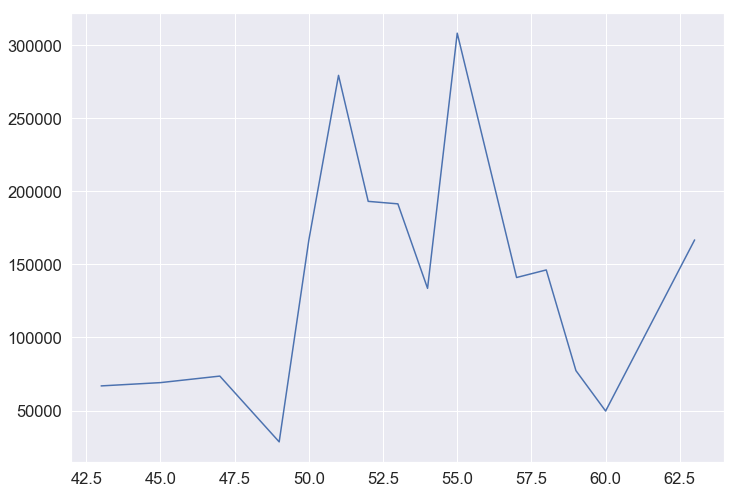

In [58]:
test['TMIN'].value_counts().sort_index().plot.line()


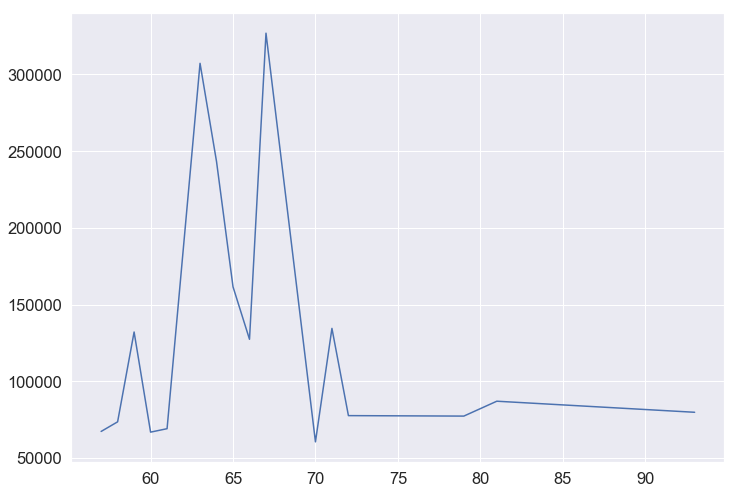

In [59]:
test['TMAX'].value_counts().sort_index().plot.line()


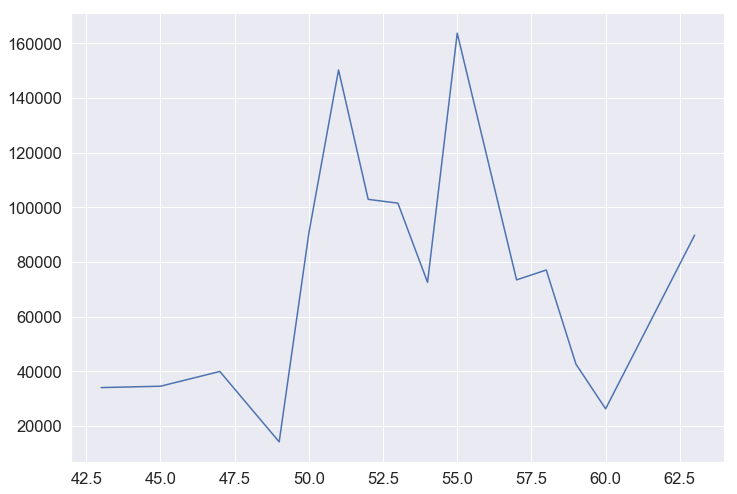

In [60]:
test['TMIN'][test['age']>35].value_counts().sort_index().plot.line()


In [33]:
crashes = pd.read_csv('Bicycle_Accidents.csv')
crashes

CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0    10/07/2019      14:40  BROOKLYN   11223.0        NaN        NaN   
1    10/01/2019       9:40       NaN       NaN        NaN        NaN   
2    10/05/2019      19:30       NaN       NaN  40.761623  -73.82208   
3    10/01/2019      15:00  BROOKLYN   11214.0  40.607710  -74.00341   
4    10/03/2019      12:00       NaN       NaN  40.619736  -73.98958   
..          ...        ...       ...       ...        ...        ...   
472  10/09/2019      10:10  BROOKLYN   11211.0  40.710450  -73.95687   
473  10/10/2019      15:20    QUEENS   11372.0  40.756145  -73.87980   
474  10/08/2019      20:09    QUEENS   11355.0  40.742634  -73.81858   
475  10/09/2019      17:50       NaN       NaN  40.667023  -73.97484   
476  10/05/2019      13:55       NaN       NaN  40.739407  -73.97671   

                   LOCATION                    ON STREET NAME  \
0                       NaN  AVENUE S                           
1                       NaN  BROOKLYN BRIDGE                    
2    (40.761623, -73.82208)  PARSONS BOULEVARD                  
3     (40.60771, -74.00341)  86 STREET                          
4    (40.619736, -73.98958)  18 AVENUE                          
..                      ...                               ...   
472   (40.71045, -73.95687)  BORINQUEN PLACE                    
473   (40.756145, -73.8798)  NORTHERN BOULEVARD                 
474  (40.742634, -73.81858)  150 STREET                         
475  (40.667023, -73.97484)  PROSPECT PARK WEST                 
476  (40.739407, -73.97671)  1 AVENUE                           

    CROSS STREET NAME OFF STREET NAME  ...   CONTRIBUTING FACTOR VEHICLE 2  \
0     EAST 8TH STREET             NaN  ...  Driver Inattention/Distraction   
1                 NaN             NaN  ...                     Unspecified   
2                 NaN             NaN  ...   Failure to Yield Right-of-Way   
3       BAY 17 STREET             NaN  ...                     Unspecified   
4                 NaN             NaN  ...                     Unspecified   
..                ...             ...  ...                             ...   
472    SOUTH 3 STREET             NaN  ...                     Unspecified   
473         88 STREET             NaN  ...                     Unspecified   
474           58 ROAD             NaN  ...                     Unspecified   
475               NaN             NaN  ...                     Unspecified   
476               NaN             NaN  ...                     Unspecified   

     CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
..                             ...                            ...   
472                            NaN                            NaN   
473                            NaN                            NaN   
474                            NaN                            NaN   
475                            NaN                            NaN   
476                            NaN                            NaN   

     CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                              NaN       4220182   
1                              NaN       4217958   
2                              NaN       4219261   
3                              NaN       4222502   
4                              NaN       4217164   
..                             ...           ...   
472                            NaN       4221226   
473                            NaN       4225011   
474                            NaN       4220138   
475                            NaN       4220709   
476                  

In [34]:
test.head()

tripduration               starttime                stoptime  \
0           527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1           174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2           759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3           615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4           761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   

   start station id      start station name  start station latitude  \
0              3746       6 Ave & Broome St               40.724308   
1              3301  Columbus Ave & W 95 St               40.791956   
2               161   LaGuardia Pl & W 3 St               40.729170   
3               254         W 11 St & 6 Ave               40.735324   
4               161   LaGuardia Pl & W 3 St               40.729170   

   start station longitude  end station id        end station name  \
0               -74.004730             223         W 13 St & 7 Ave   
1               -73.968087            3283  W 89 St & Columbus Ave   
2               -73.998102             174         E 25 St & 1 Ave   
3               -73.998004             477         W 41 St & 8 Ave   
4               -73.998102             174         E 25 St & 1 Ave   

   end station latitude  ...  gender        date hour  age  PRCP SNOW  SNWD  \
0             40.737815  ...       1  2019-10-01    0   27   0.0  0.0   0.0   
1             40.788221  ...       1  2019-10-01    0   28   0.0  0.0   0.0   
2             40.738177  ...       1  2019-10-01    0   25   0.0  0.0   0.0   
3             40.756405  ...       1  2019-10-01    0   28   0.0  0.0   0.0   
4             40.738177  ...       1  2019-10-01    0   28   0.0  0.0   0.0   

   TMAX  TMIN  AWND  
0    81    63   3.8  
1    81    63   3.8  
2    81    63   3.8  
3    81    63   3.8  
4    81    63   3.8  

[5 rows x 24 columns]

In [35]:
user_name = 'masghar94'
password = 'Peppermint94!'


In [36]:
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Geometry
from arcgis.gis import GIS
import pandas as pd

gis = GIS('https://www.arcgis.com', user_name, password)

def get_zip(df, lon_field, lat_field):
    location = reverse_geocode((Geometry({"x":float(df[lon_field]), "y":float(df[lat_field]), "spatialReference":{"wkid": 4326}})))
    return location['address']['Postal']

new = pd.DataFrame({
    'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
    'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
})


In [37]:
new

Lat       Lon
0  29.39291 -98.50925
1  29.39923 -98.51256
2  29.40147 -98.51123
3  29.38752 -98.52372
4  29.39291 -98.50925
5  29.39537 -98.50402
6  29.39343 -98.49707
7  29.39291 -98.50925
8  29.39556 -98.53148

In [38]:
zips = test[['start station latitude', 'start station longitude']]
zips = zips.rename(columns = {'start station latitude':'Lat', 'start station longitude':'Lon'})
zips

Lat        Lon
0        40.724308 -74.004730
1        40.791956 -73.968087
2        40.729170 -73.998102
3        40.735324 -73.998004
4        40.729170 -73.998102
...            ...        ...
2092081  40.730473 -73.986724
2092082  40.749370 -73.999234
2092083  40.752269 -73.982079
2092084  40.724055 -74.009660
2092085  40.715348 -73.960241

[2092086 rows x 2 columns]

In [39]:
zips = zips.drop_duplicates()
zips

Lat        Lon
0        40.724308 -74.004730
1        40.791956 -73.968087
2        40.729170 -73.998102
3        40.735324 -73.998004
6        40.755942 -74.002116
...            ...        ...
1974238  40.685650 -73.915640
1993806  40.690470 -73.923511
2076137  40.688220 -73.919660
2083473  40.688200 -73.907980
2091260  40.686520 -73.913210

[837 rows x 2 columns]

In [40]:
zipcodes = zips.apply(get_zip, axis=1, lat_field='Lat', lon_field='Lon')


In [41]:
zipcodes

0          10013
1          10025
2          10012
3          10011
6          10001
           ...  
1974238    11207
1993806    11221
2076137    11221
2083473    11207
2091260    11207
Length: 837, dtype: object

In [42]:
zips['zipcode'] = zipcodes
zips

/Users/maheenasghar/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lat        Lon zipcode
0        40.724308 -74.004730   10013
1        40.791956 -73.968087   10025
2        40.729170 -73.998102   10012
3        40.735324 -73.998004   10011
6        40.755942 -74.002116   10001
...            ...        ...     ...
1974238  40.685650 -73.915640   11207
1993806  40.690470 -73.923511   11221
2076137  40.688220 -73.919660   11221
2083473  40.688200 -73.907980   11207
2091260  40.686520 -73.913210   11207

[837 rows x 3 columns]

In [43]:
zips = zips.rename(columns = {'Lat':'start station latitude', 'Lon':'start station longitude'})

In [44]:
zips

start station latitude  start station longitude zipcode
0                     40.724308               -74.004730   10013
1                     40.791956               -73.968087   10025
2                     40.729170               -73.998102   10012
3                     40.735324               -73.998004   10011
6                     40.755942               -74.002116   10001
...                         ...                      ...     ...
1974238               40.685650               -73.915640   11207
1993806               40.690470               -73.923511   11221
2076137               40.688220               -73.919660   11221
2083473               40.688200               -73.907980   11207
2091260               40.686520               -73.913210   11207

[837 rows x 3 columns]

In [45]:
test

tripduration               starttime                stoptime  \
0                 527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1                 174 2019-10-01 00:00:15.875 2019-10-01 00:03:10.168   
2                 759 2019-10-01 00:00:19.824 2019-10-01 00:12:59.707   
3                 615 2019-10-01 00:00:21.068 2019-10-01 00:10:36.679   
4                 761 2019-10-01 00:00:26.380 2019-10-01 00:13:08.313   
...               ...                     ...                     ...   
2092081           729 2019-10-31 23:59:12.190 2019-11-01 00:11:21.486   
2092082           645 2019-10-31 23:59:17.047 2019-11-01 00:10:02.945   
2092083           257 2019-10-31 23:59:22.514 2019-11-01 00:03:40.260   
2092084           466 2019-10-31 23:59:23.171 2019-11-01 00:07:09.205   
2092085            81 2019-10-31 23:59:51.517 2019-11-01 00:01:13.215   

         start station id              start station name  \
0                    3746               6 Ave & Broome St   
1                    3301          Columbus Ave & W 95 St   
2                     161           LaGuardia Pl & W 3 St   
3                     254                 W 11 St & 6 Ave   
4                     161           LaGuardia Pl & W 3 St   
...                   ...                             ...   
2092081               237                 E 11 St & 2 Ave   
2092082              3259                 9 Ave & W 28 St   
2092083              3798                 W 40 St & 5 Ave   
2092084               328         Watts St & Greenwich St   
2092085               539  Metropolitan Ave & Bedford Ave   

         start station latitude  start station longitude  end station id  \
0                     40.724308               -74.004730             223   
1                     40.791956               -73.968087            3283   
2                     40.729170               -73.998102             174   
3                     40.735324               -73.998004             477   
4                     40.729170               -73.998102             174   
...                         ...                      ...             ...   
2092081               40.730473               -73.986724             311   
2092082               40.749370               -73.999234             461   
2092083               40.752269               -73.982079             505   
2092084               40.724055               -74.009660             361   
2092085               40.715348               -73.960241            3093   

               end station name  end station latitude  ...  gender  \
0               W 13 St & 7 Ave             40.737815  ...       1   
1        W 89 St & Columbus Ave             40.788221  ...       1   
2               E 25 St & 1 Ave             40.738177  ...       1   
3               W 41 St & 8 Ave             40.756405  ...       1   
4               E 25 St & 1 Ave             40.738177  ...       1   
...                         ...                   ...  ...     ...   
2092081  Norfolk St & Broome St             40.717227  ...       1   
2092082         E 20 St & 2 Ave             40.735877  ...       0   
2092083         6 Ave & W 33 St             40.749013  ...       1   
2092084    Allen St & Hester St             40.716059  ...       0   
2092085    N 6 St & Bedford Ave             40.717452  ...       1   

               date hour  age  PRCP SNOW  SNWD  TMAX  TMIN  AWND  
0        2019-10-01    0   27  0.00  0.0   0.0    81    63  3.80  
1        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
2        2019-10-01    0   25  0.00  0.0   0.0    81    63  3.80  
3        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
4        2019-10-01    0   28  0.00  0.0   0.0    81    63  3.80  
...             ...  ...  ...   ...  ...   ...   ...   ...   ...  
2092081  2019-10-31    0   25  0.54  0.0   0.0    71    60  5.14  
2092082  2019-10-31    0   51  0.54  0.0   0.0    71    60  5.14  
2092083  2019-10-31    0   35  0.54  0.0  

In [46]:
final = pd.merge(test, zips)
final['zipcode'] = pd.to_numeric(final['zipcode'])


In [47]:
final[['start station latitude', 'start station longitude', 'zipcode']][final.isnull().any(axis=1)]


start station latitude  start station longitude  zipcode
364949                40.704118               -73.948186      NaN
364950                40.704118               -73.948186      NaN
364951                40.704118               -73.948186      NaN
364952                40.704118               -73.948186      NaN
364953                40.704118               -73.948186      NaN
...                         ...                      ...      ...
2088852               40.730386               -74.002150      NaN
2088853               40.730386               -74.002150      NaN
2088854               40.730386               -74.002150      NaN
2088855               40.730386               -74.002150      NaN
2088856               40.730386               -74.002150      NaN

[59410 rows x 3 columns]

In [49]:
income = pd.read_excel('MeanZIP-3.xlsx')
income = income.rename(columns = {'Zip':'zipcode'})
income = income.rename(columns = {'Mean':'Income'})


income

zipcode      Median   Income    Pop
0         1001  56662.5735  66687.8  16445
1         1002  49853.4177  75062.6  28069
2         1003  28462.0000    35121   8491
3         1005  75423.0000    82442   4798
4         1007  79076.3540    85802  12962
...        ...         ...      ...    ...
32629    99923  43625.0000    42895     87
32630    99925  50357.0000    63808    819
32631    99926  44063.0000    51660   1460
32632    99927  41815.0000    55501     94
32633    99929  50389.0000    69595   2338

[32634 rows x 4 columns]

In [52]:
final = pd.merge(final, income[['zipcode', 'Income']])

In [53]:
final

tripduration               starttime                stoptime  \
0                 527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1                2048 2019-10-01 01:24:55.718 2019-10-01 01:59:04.643   
2                 869 2019-10-01 05:49:17.419 2019-10-01 06:03:46.905   
3                 343 2019-10-01 06:14:46.639 2019-10-01 06:20:29.867   
4                 706 2019-10-01 06:27:29.182 2019-10-01 06:39:15.774   
...               ...                     ...                     ...   
1965895          1222 2019-10-31 18:58:05.186 2019-10-31 19:18:27.725   
1965896          1660 2019-10-31 21:02:01.937 2019-10-31 21:29:42.084   
1965897          1139 2019-10-31 23:12:57.536 2019-10-31 23:31:56.803   
1965898           747 2019-10-31 19:48:50.190 2019-10-31 20:01:17.767   
1965899           455 2019-10-31 23:17:14.588 2019-10-31 23:24:49.973   

         start station id        start station name  start station latitude  \
0                    3746         6 Ave & Broome St               40.724308   
1                    3746         6 Ave & Broome St               40.724308   
2                    3746         6 Ave & Broome St               40.724308   
3                    3746         6 Ave & Broome St               40.724308   
4                    3746         6 Ave & Broome St               40.724308   
...                   ...                       ...                     ...   
1965895              3827      Halsey St & Broadway               40.685650   
1965896              3827      Halsey St & Broadway               40.685650   
1965897              3827      Halsey St & Broadway               40.685650   
1965898              3829  Central Ave & Decatur St               40.688200   
1965899              3828  Eldert St & Bushwick Ave               40.686520   

         start station longitude  end station id           end station name  \
0                      -74.00473             223            W 13 St & 7 Ave   
1                      -74.00473             467            Dean St & 4 Ave   
2                      -74.00473             490            8 Ave & W 33 St   
3                      -74.00473            3461   Murray St & Greenwich St   
4                      -74.00473             546       E 30 St & Park Ave S   
...                          ...             ...                        ...   
1965895                -73.91564            3067      Broadway & Whipple St   
1965896                -73.91564            3058  Lewis Ave & Kosciuszko St   
1965897                -73.91564            3763  Wyckoff Av & Jefferson St   
1965898                -73.90798            3778    Irving Ave & DeKalb Ave   
1965899                -73.91321            3837   Broadway & Kosciuszko St   

         end station latitude  ...  hour  age  PRCP  SNOW  SNWD TMAX  TMIN  \
0                   40.737815  ...     0   27  0.00   0.0   0.0   81    63   
1                   40.683125  ...     1   25  0.00   0.0   0.0   81    63   
2                   40.751551  ...     6   28  0.00   0.0   0.0   81    63   
3                   40.714852  ...     6   27  0.00   0.0   0.0   81    63   
4                   40.744449  ...     6   39  0.00   0.0   0.0   81    63   
...                       ...  ...   ...  ...   ...   ...   ...  ...   ...   
1965895             40.701666  ...    19   25  0.54   0.0   0.0   71    60   
1965896             40.692371  ...    21   23  0.54   0.0   0.0   71    60   
1965897             40.707165  ...    23   25  0.54   0.0   0.0   71    60   
1965898             40.702700  ...    20   36  0.54   0.0   0.0   71    60   
1965899             40.693290  ...    23   28  0.54   0.0   0.0   71    60   

         AWND  zipcode   Income  
0        3.80  10013.0   137738  
1        3.80  10013.0   137738  
2        3.80  10013.0   137738  
3        3.80  10013.0   137738  
4        3.80  10013.0   137738  
...       ...      ...      ...  
1965895  5.14  11207.0  44634.1  
1965896  5.14  11207.0  4

In [54]:
final['zipcode'].nunique()

56

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

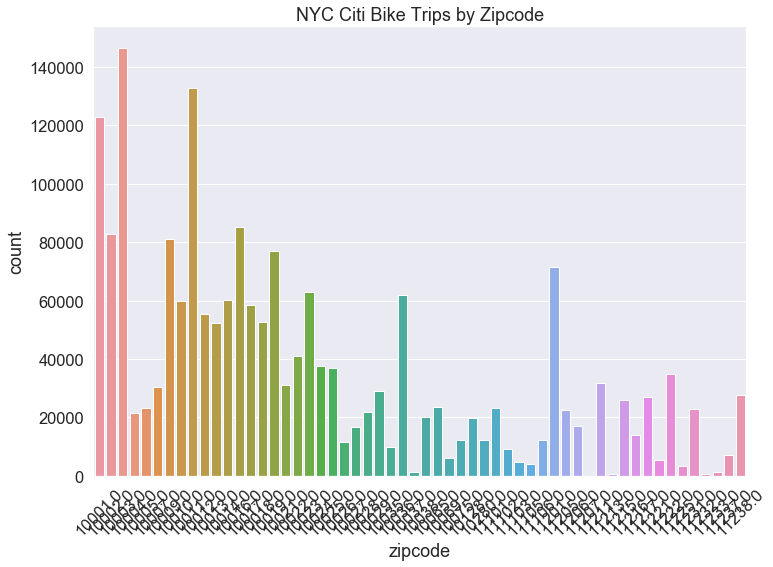

In [56]:
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)}) 
sns.countplot(x =final['zipcode']).set_title("NYC Citi Bike Trips by Zipcode")
plt.xticks(rotation=45)

In [57]:
final['incomebin'] = pd.cut(final['Income'], [0, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

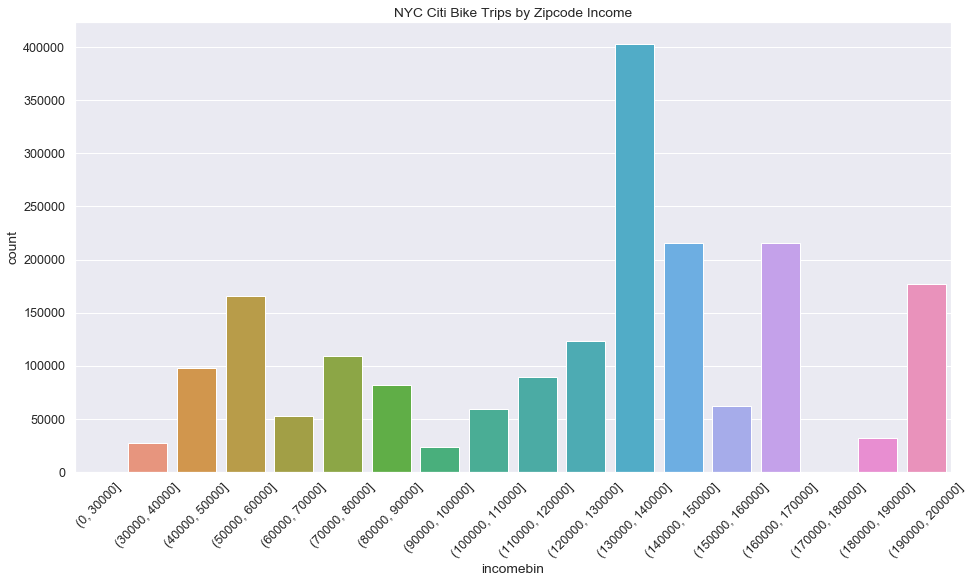

In [61]:
sns.set(font_scale=1.15, rc={'figure.figsize':(15.7,8.27)}) 

sns.countplot(x =final['incomebin']).set_title("NYC Citi Bike Trips by Zipcode Income")
plt.xticks(rotation=45)

In [431]:
final['start station name'].value_counts()

Pershing Square North            16424
8 Ave & W 31 St                  12836
W 21 St & 6 Ave                  12413
E 17 St & Broadway               12389
Broadway & E 22 St               10925
                                 ...  
Grove St & Broadway                  6
Broadway & Madison St                5
Knickerbocker Ave & Cooper St        2
Eldert St & Bushwick Ave             1
Central Ave & Decatur St             1
Name: start station name, Length: 797, dtype: int64

In [436]:
stations = final[['start station name', 'start station latitude', 'start station longitude']].drop_duplicates()
stations['count'] = final.groupby(['start station name'])['start station name'].transform('count')
stations

start station name  start station latitude  \
0                    6 Ave & Broome St               40.724308   
5176           Grand St & Elizabeth St               40.718822   
13443          Harrison St & Hudson St               40.718710   
15294            Bayard St & Baxter St               40.716021   
18841             Hudson St & Reade St               40.716250   
...                                ...                     ...   
1965871  Knickerbocker Ave & Cooper St               40.690810   
1965873           Moffat St & Bushwick               40.684580   
1965884           Halsey St & Broadway               40.685650   
1965898       Central Ave & Decatur St               40.688200   
1965899       Eldert St & Bushwick Ave               40.686520   

         start station longitude  count  
0                     -74.004730   5176  
5176                  -73.995960   8267  
13443                 -74.009001   1851  
15294                 -73.999744   3547  
18841                 -74.009106   3178  
...                          ...    ...  
1965871               -73.904480      2  
1965873               -73.909250     11  
1965884               -73.915640     14  
1965898               -73.907980      1  
1965899               -73.913210      1  

[797 rows x 4 columns]

In [546]:
import folium
from folium.plugins import FastMarkerCluster, MarkerCluster




In [451]:
from folium import plugins
from folium.plugins import HeatMap


In [5]:
fname = 'Zip Code Data/ZIP_CODE_040114.shp'
syd_geo = geopandas.read_file(fname)
syd_geo.head()
syd_geo=syd_geo[['ZIPCODE','geometry']]
syd_geo=syd_geo.rename(columns = {'ZIPCODE':'zipcode'})

In [473]:
syd_geo['zipcode'] = syd_geo['zipcode'].str.replace('%','').astype(np.float64)
syd_geo.dtypes

zipcode      float64
geometry    geometry
dtype: object

In [537]:
incomes = final[['zipcode', 'Income']].drop_duplicates()
incomes['count'] = final.groupby(['start station name'])['start station name'].transform('count')
incomes = incomes.astype(int)
incomes

zipcode  Income  count
0          10013  137738   5176
52285      10025  112009   3846
89216      10012  135998   6356
144638     10011  160936   5388
277379     10001  123112   7881
400393     11103   66421    971
404957     11215  109383    846
430927     10016  144872   6870
516270     10003  139330   7092
662879     11211   52060   2300
694692     10009   78138   8168
775905     10036   89879   6261
837891     10014  162205   3541
898096     10019  133175   7301
975077     10002   46258   2429
1057928    11238   79249    619
1085684    11102   61244    642
1094910    11201  140857   2601
1166344    10029   56937    970
1195521    11206   38579    288
1212526    10028  192257   2118
1234347    11222   69808   2111
1269134    10007  256235   4132
1299417    10021  198530   1730
1330421    10018  112292   9463
1383085    11221   46669    515
1388445    10065  191673   6690
1411888    11106   56437    675
1424018    10017  149723   4046
1482485    11217  102949   2549
1509400    10023  194365   3910
1572441    11101   51519    503
1595628    10010  137105  10123
1655336    10038   89760   3869
1675494    10022  158965   3642
1716353    10005  163762   5012
1739482    10024  191408   2267
1777040    11205   57436   1347
1799666    11105   68394   1797
1803603    11231   95031   1063
1826639    11225   52484    274
1830106    10027   57766   2111
1846886    10128  180473   1367
1866836    10004  156682   2239
1888330    10280  138990   8111
1900627    11237   43843    436
1907857    10035   37221    692
1917824    11216   52038    601
1931713    10075  188422    196
1943938    11233   45326    813
1945257    10026   50331   1784
1956846    10069  108783   2558
1963063    10037   52944   1410
1964473    11213   46614    781
1965254    11232   45833    186
1965828    11207   44634     43

In [538]:
sydgeo_gdf=syd_geo.merge(incomes,on="zipcode")
sydgeo_gdf['zipcode'] = sydgeo_gdf['zipcode'].astype(int)
sydgeo_gdf.head(2)

zipcode                                           geometry  Income  count
0    11213  POLYGON ((1001613.713 186926.440, 1002314.243 ...   46614    781
1    11225  POLYGON ((995908.365 183617.613, 996522.848 18...   52484    274

In [539]:
x_map=sydgeo_gdf.centroid.x.mean()
y_map=sydgeo_gdf.centroid.y.mean()
print(x_map,y_map)


992500.5725148971 206264.14328842066


In [575]:
syd_inc_map = folium.Map(location = [40.758896, -73.985130], zoom_start = 12, tiles = "CartoDB dark_matter")

folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(syd_inc_map)

syd_inc_map.choropleth(
                geo_data=sydgeo_gdf,
             name='Choropleth',         
             data=sydgeo_gdf,
             columns=['zipcode', 'Income'], 
             key_on='feature.properties.zipcode', 
             fill_color='YlOrRd',
             fill_opacity=0.6, 
             line_opacity=0.8,
             legend_name='Income', 
             smooth_factor=0,     
             highlight=True
                 ) 

syd_inc_map

/Users/maheenasghar/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [550]:
syd_inc_map = folium.Map(location = [40.758896, -73.985130], zoom_start = 12, tiles = "CartoDB dark_matter")

folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(syd_inc_map)

syd_inc_map.choropleth(
                geo_data=sydgeo_gdf,
             name='Choropleth',         
             data=sydgeo_gdf,
             columns=['zipcode', 'count'], 
             key_on='feature.properties.zipcode', 
             fill_color='YlOrRd',
             fill_opacity=0.6, 
             line_opacity=0.8,
             legend_name='Count', 
             smooth_factor=0,     
             highlight=True
                 ) 

syd_inc_map

In [582]:
f = folium.Figure(width=1000, height=1350)

manhattan = folium.Map(location = [40.758896, -73.985130], zoom_start = 12, tiles = "CartoDB positron").add_to(f)

#reference: https://towardsdatascience.com/bikes-of-new-york-6e0bbe5507f8
mc = MarkerCluster(name = "Marker Cluster")



folium.Choropleth(
    geo_data=sydgeo_gdf,
    name='choropleth',
    data=sydgeo_gdf,
    columns=['zipcode', 'Income'], 
    key_on='feature.properties.zipcode', 
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.7,
    legend_name='Income', 
             smooth_factor=0,     
             highlight=True
).add_to(manhattan)

#reference: https://towardsdatascience.com/bikes-of-new-york-6e0bbe5507f8
mc = MarkerCluster(name = "Marker Cluster")

for index, row in stations.iterrows():
    popup_text = "Station: {}, Trips: {}".format(
                      row["start station name"],
                      row["count"])
    folium.CircleMarker(location=[row["start station latitude"],row["start station longitude"]],
                        radius= 5,
                        color="green",
                        popup=popup_text,
                        fill=True).add_to(mc)

mc.add_to(manhattan)

folium.LayerControl().add_to(manhattan)

manhattan

In [583]:
f = folium.Figure(width=1000, height=1350)

manhattan = folium.Map(location = [40.758896, -73.985130], zoom_start = 12, tiles = "CartoDB positron").add_to(f)


#reference: https://towardsdatascience.com/bikes-of-new-york-6e0bbe5507f8
mc = MarkerCluster(name = "Marker Cluster")


folium.Choropleth(
    geo_data=sydgeo_gdf,
    name='choropleth',
    data=sydgeo_gdf,
    columns=['zipcode', 'count'], 
    key_on='feature.properties.zipcode', 
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.7,
    legend_name='Trips', 
             smooth_factor=0,     
             highlight=True
).add_to(manhattan)

#reference: https://towardsdatascience.com/bikes-of-new-york-6e0bbe5507f8
mc = MarkerCluster(name = "Marker Cluster")

for index, row in stations.iterrows():
    popup_text = "Station: {}, Trips: {}".format(
                      row["start station name"],
                      row["count"])
    folium.CircleMarker(location=[row["start station latitude"],row["start station longitude"]],
                        radius= 5,
                        color="green",
                        popup=popup_text,
                        fill=True).add_to(mc)

mc.add_to(manhattan)

folium.LayerControl().add_to(manhattan)

manhattan

In [513]:
stations

start station name  start station latitude  \
0                    6 Ave & Broome St               40.724308   
5176           Grand St & Elizabeth St               40.718822   
13443          Harrison St & Hudson St               40.718710   
15294            Bayard St & Baxter St               40.716021   
18841             Hudson St & Reade St               40.716250   
...                                ...                     ...   
1965871  Knickerbocker Ave & Cooper St               40.690810   
1965873           Moffat St & Bushwick               40.684580   
1965884           Halsey St & Broadway               40.685650   
1965898       Central Ave & Decatur St               40.688200   
1965899       Eldert St & Bushwick Ave               40.686520   

         start station longitude  count  
0                     -74.004730   5176  
5176                  -73.995960   8267  
13443                 -74.009001   1851  
15294                 -73.999744   3547  
18841                 -74.009106   3178  
...                          ...    ...  
1965871               -73.904480      2  
1965873               -73.909250     11  
1965884               -73.915640     14  
1965898               -73.907980      1  
1965899               -73.913210      1  

[797 rows x 4 columns]

In [522]:
analysis = final[['start station name', 'Income']].drop_duplicates()
analysis['trips'] = final.groupby(['start station name'])['start station name'].transform('count')
analysis


start station name   Income  trips
0                    6 Ave & Broome St   137738   5176
5176           Grand St & Elizabeth St   137738   8267
13443          Harrison St & Hudson St   137738   1851
15294            Bayard St & Baxter St   137738   3547
18841             Hudson St & Reade St   137738   3178
...                                ...      ...    ...
1965871  Knickerbocker Ave & Cooper St  44634.1      2
1965873           Moffat St & Bushwick  44634.1     11
1965884           Halsey St & Broadway  44634.1     14
1965898       Central Ave & Decatur St  44634.1      1
1965899       Eldert St & Bushwick Ave  44634.1      1

[797 rows x 3 columns]

In [589]:
final

tripduration               starttime                stoptime  \
0                 527 2019-10-01 00:00:05.618 2019-10-01 00:08:52.943   
1                2048 2019-10-01 01:24:55.718 2019-10-01 01:59:04.643   
2                 869 2019-10-01 05:49:17.419 2019-10-01 06:03:46.905   
3                 343 2019-10-01 06:14:46.639 2019-10-01 06:20:29.867   
4                 706 2019-10-01 06:27:29.182 2019-10-01 06:39:15.774   
...               ...                     ...                     ...   
1965895          1222 2019-10-31 18:58:05.186 2019-10-31 19:18:27.725   
1965896          1660 2019-10-31 21:02:01.937 2019-10-31 21:29:42.084   
1965897          1139 2019-10-31 23:12:57.536 2019-10-31 23:31:56.803   
1965898           747 2019-10-31 19:48:50.190 2019-10-31 20:01:17.767   
1965899           455 2019-10-31 23:17:14.588 2019-10-31 23:24:49.973   

         start station id        start station name  start station latitude  \
0                    3746         6 Ave & Broome St               40.724308   
1                    3746         6 Ave & Broome St               40.724308   
2                    3746         6 Ave & Broome St               40.724308   
3                    3746         6 Ave & Broome St               40.724308   
4                    3746         6 Ave & Broome St               40.724308   
...                   ...                       ...                     ...   
1965895              3827      Halsey St & Broadway               40.685650   
1965896              3827      Halsey St & Broadway               40.685650   
1965897              3827      Halsey St & Broadway               40.685650   
1965898              3829  Central Ave & Decatur St               40.688200   
1965899              3828  Eldert St & Bushwick Ave               40.686520   

         start station longitude  end station id           end station name  \
0                      -74.00473             223            W 13 St & 7 Ave   
1                      -74.00473             467            Dean St & 4 Ave   
2                      -74.00473             490            8 Ave & W 33 St   
3                      -74.00473            3461   Murray St & Greenwich St   
4                      -74.00473             546       E 30 St & Park Ave S   
...                          ...             ...                        ...   
1965895                -73.91564            3067      Broadway & Whipple St   
1965896                -73.91564            3058  Lewis Ave & Kosciuszko St   
1965897                -73.91564            3763  Wyckoff Av & Jefferson St   
1965898                -73.90798            3778    Irving Ave & DeKalb Ave   
1965899                -73.91321            3837   Broadway & Kosciuszko St   

         end station latitude  ...  age  PRCP SNOW  SNWD  TMAX TMIN  AWND  \
0                   40.737815  ...   27  0.00  0.0   0.0    81   63  3.80   
1                   40.683125  ...   25  0.00  0.0   0.0    81   63  3.80   
2                   40.751551  ...   28  0.00  0.0   0.0    81   63  3.80   
3                   40.714852  ...   27  0.00  0.0   0.0    81   63  3.80   
4                   40.744449  ...   39  0.00  0.0   0.0    81   63  3.80   
...                       ...  ...  ...   ...  ...   ...   ...  ...   ...   
1965895             40.701666  ...   25  0.54  0.0   0.0    71   60  5.14   
1965896             40.692371  ...   23  0.54  0.0   0.0    71   60  5.14   
1965897             40.707165  ...   25  0.54  0.0   0.0    71   60  5.14   
1965898             40.702700  ...   36  0.54  0.0   0.0    71   60  5.14   
1965899             40.693290  ...   28  0.54  0.0   0.0    71   60  5.14   

         zipcode   Income         incomebin  
0        10013.0   137738  (130000, 140000]  
1        10013.0   137738  (130000, 140000]  
2        10013.0   137738  (130000, 140000]  
3        10013.0   137738  (130000, 140000]  
4        10013.0   137738  (130000, 140000]  
...          ...      ...        

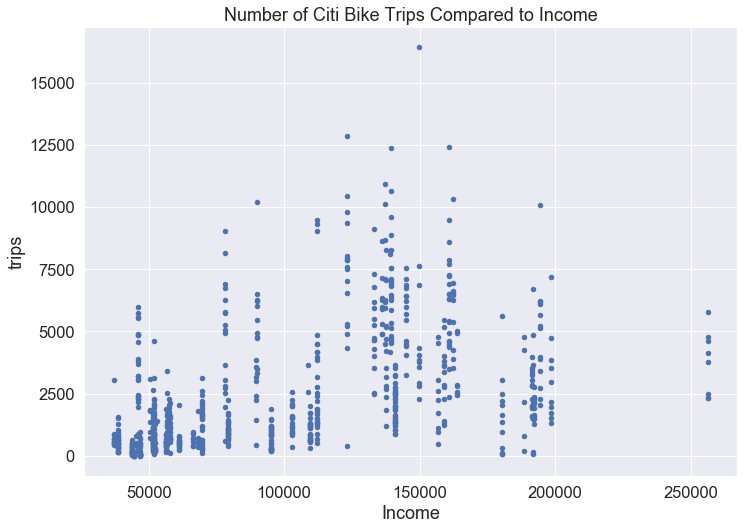

In [595]:
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)}) 
analysis.plot.scatter(x='Income', y='trips', title= "Number of Citi Bike Trips Compared to Income")


In [593]:
analysis['Income'] = pd.to_numeric(analysis['Income'])


In [596]:
sns.regplot(x="Income",
            y="trips", 
            data=analysis)

TypeError: regplot() got an unexpected keyword argument 'title'

In [646]:
low = final[['date', 'incomebin']][final['Income']<=60000]
low_total = pd.crosstab(low['date'], low['incomebin'])
low_total

incomebin   (30000, 40000]  (40000, 50000]  (50000, 60000]
date                                                      
2019-10-01            1091            3699            6755
2019-10-02            1048            3449            6185
2019-10-03             511            1841            3152
2019-10-04            1077            3661            6364
2019-10-05            1166            3934            6852
2019-10-06             850            3604            5804
2019-10-07            1029            3265            5769
2019-10-08             981            3576            5920
2019-10-09             650            2174            3839
2019-10-10             977            3768            6120
2019-10-11             987            3545            5768
2019-10-12            1024            4009            6474
2019-10-13             971            3916            6203
2019-10-14             904            3570            6037
2019-10-15            1067            3579            6051
2019-10-16             609            2139            3536
2019-10-17             777            2502            4807
2019-10-18             920            3385            5420
2019-10-19             965            3780            6826
2019-10-20             466            1726            2737
2019-10-21             915            3378            5700
2019-10-22             697            2589            4056
2019-10-23             886            3369            5934
2019-10-24             936            3659            6173
2019-10-25            1037            3726            6098
2019-10-26             932            3677            6414
2019-10-27             434            1605            2538
2019-10-28             917            3297            5728
2019-10-29             720            2427            3998
2019-10-30             788            3011            5022
2019-10-31             640            2327            3788

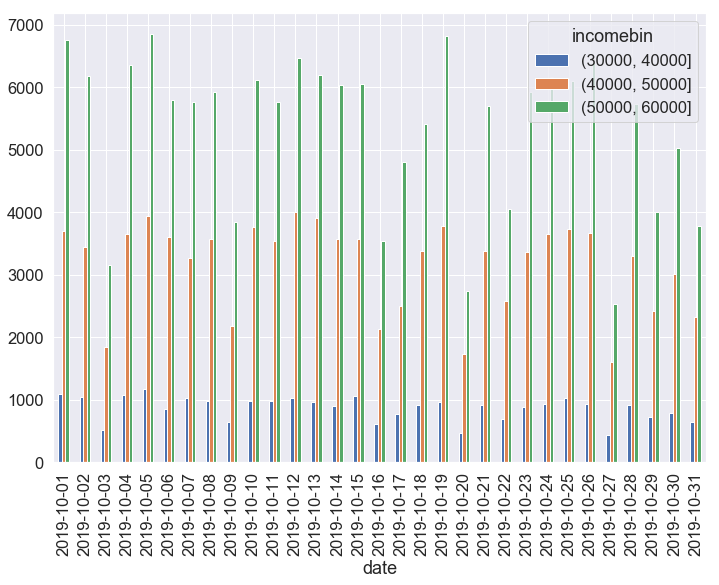

In [647]:
low_total.plot.bar()

In [65]:
low_sub = final[['date', 'tripduration', 'usertype', 'gender', 'incomebin']][final['Income']<=60000]

(array([0, 1]), <a list of 2 Text xticklabel objects>)

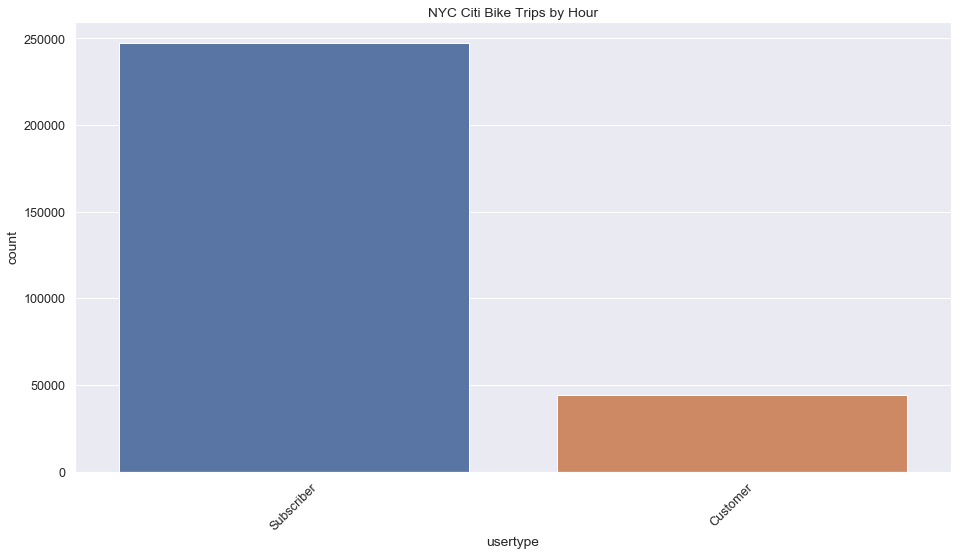

In [66]:
sns.countplot(x =low_sub['usertype']).set_title("NYC Citi Bike Trips by Hour")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

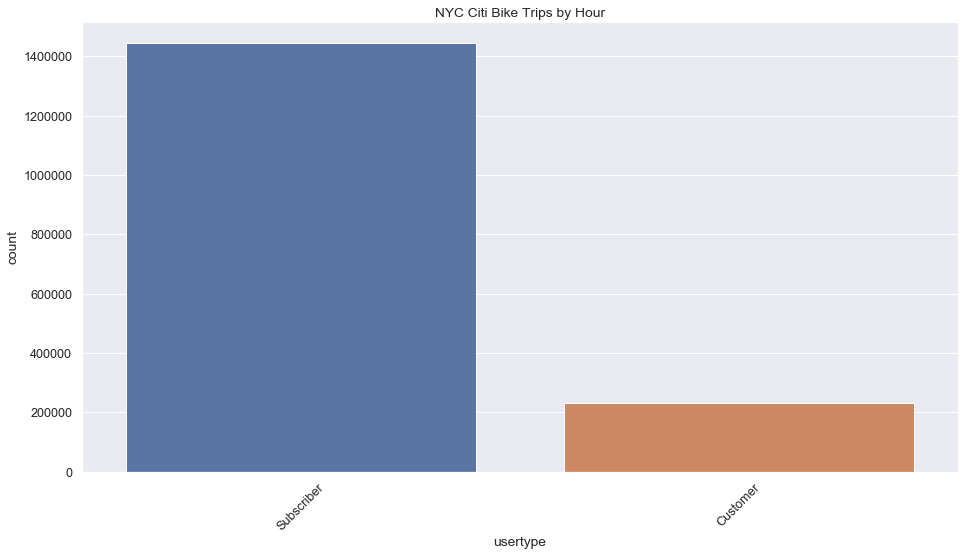

In [67]:
high_sub = final[['date', 'usertype','tripduration',  'gender', 'incomebin']][final['Income']>60000]
sns.countplot(x =high_sub['usertype']).set_title("NYC Citi Bike Trips by Hour")
plt.xticks(rotation=45)

In [74]:
low_sub['tripduration'].mean()

867.3315970016516

In [70]:
low_sub['tripduration'].mode()

0    325
dtype: int64

In [71]:
high_sub['tripduration'].mean()

835.1656645804883

In [72]:
high_sub['tripduration'].mode()

0    318
dtype: int64

In [76]:
final['Income'].mean()

125625.11221078548

In [77]:
final['Income'].median()

137105.706